<a href="https://www.kaggle.com/code/hrishikeshrk/titanic-notebook?scriptVersionId=136532000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    filepaths=[]
    for filename in filenames:
        print(os.path.join(dirname, filename))
        filepaths.append(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
survival_data=pd.read_csv(filepaths[0])
survival_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
survival_data.shape

(891, 12)

In [4]:
survival_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
survival_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

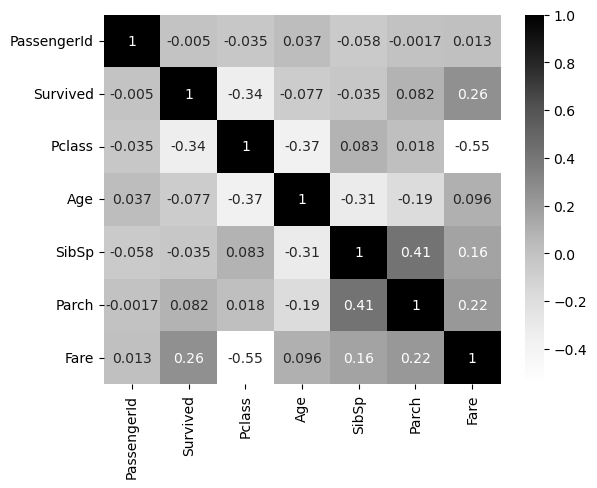

In [6]:
#Checking the correlations betwween data
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(survival_data.corr() , cmap='Greys' , annot=True)

Pclass and Fare has more correlations than other attributes. Pclass is negatively correlated which means when the status is high the chances of survival is high. Fare is positively correlated, which means higher the ticket fare chances of survival is also high. Since gender is a categorical data we cannot interpret if the attribute has influence on output from correlation.

<AxesSubplot:xlabel='Sex', ylabel='count'>

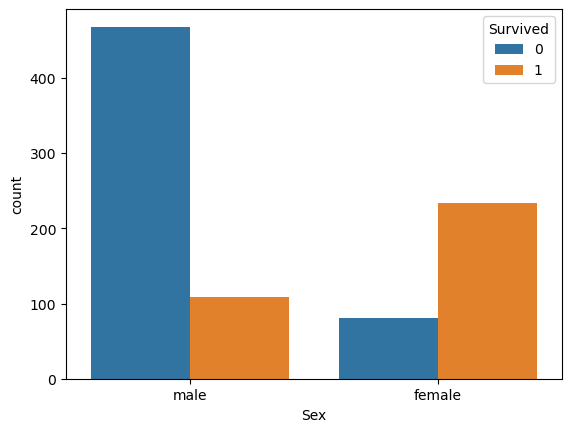

In [7]:
#analysing sex attribute
sns.countplot(data=survival_data,x='Sex',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

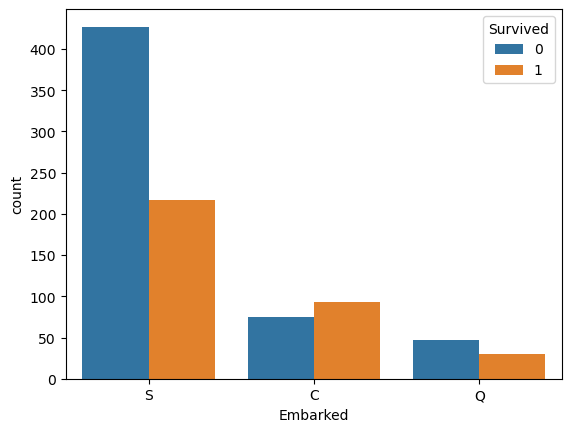

In [8]:
#analysing sex attribute
sns.countplot(data=survival_data,x='Embarked',hue='Survived')

In [9]:
survival_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

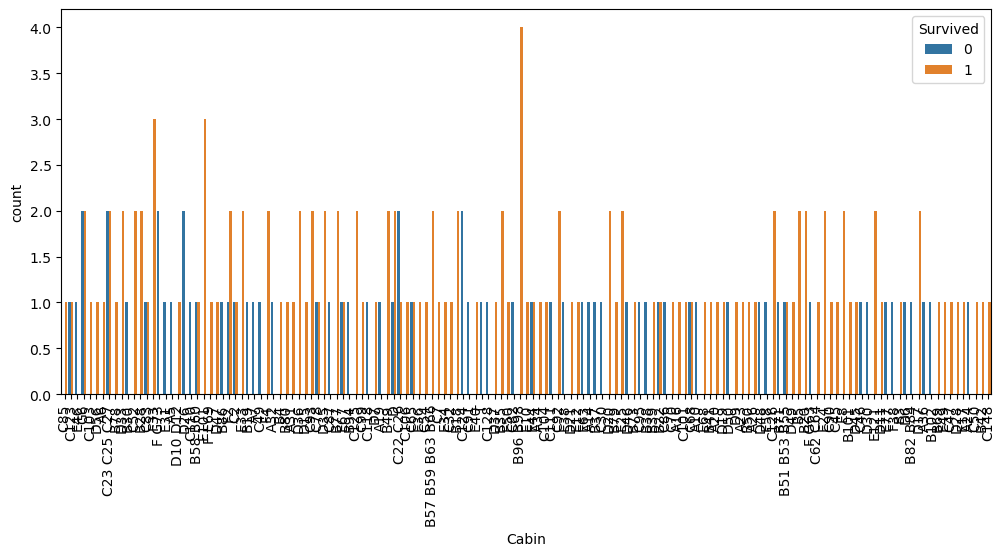

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(data=survival_data,x='Cabin',hue='Survived')
plt.xticks(rotation=90)
plt.show()

In [11]:
#simplyfing cabin data
survival_data['t_Cabin'] = survival_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
survival_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,t_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


<AxesSubplot:xlabel='t_Cabin', ylabel='count'>

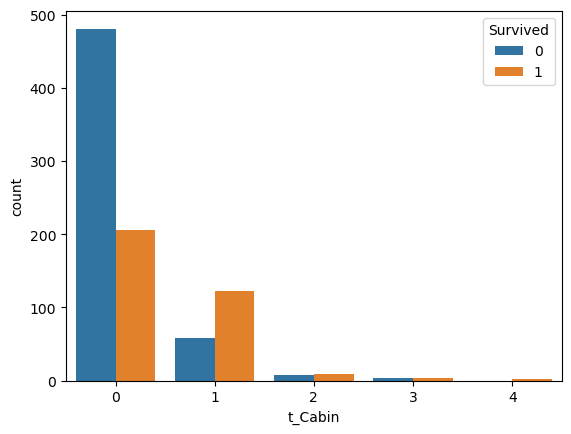

In [12]:
sns.countplot(data=survival_data,x='t_Cabin',hue='Survived')

# Data preprocessing
1. Sex - convert "Sex" attribute to numerical say 1 for male and 0 for female
2. Age - fill null values with mean age
3. Embareked -
    *     Fill null value with S if survived = 0 else C    
    *     Convert to numerical say, 0-S, 1-C, 2-Q

In [13]:
survival_data['t_Sex']=survival_data['Sex'].apply(lambda x: 0 if x=='female' else 1)

survival_data['Age'].fillna(value=survival_data['Age'].mean(),inplace=True)

for i in range(len(survival_data)):
    if pd.isna(survival_data.Embarked[i]):
        if survival_data.Survived[i]==0:
            survival_data.Embarked[i]='S'
        else:
            survival_data.Embarked[i]='C'
            
survival_data['t_Embarked']=survival_data.Embarked.apply(lambda x: 0 if x=='S' else (1 if x=='C' else 2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
survival_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  t_Cabin      891 non-null    int64  
 13  t_Sex        891 non-null    int64  
 14  t_Embarked   891 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [16]:
class ageImputer(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        #Creating an instance of Simple imputer
        imputer = SimpleImputer(strategy='mean')
        #transfroming values
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [17]:
#encoding embarked
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        #transforming embarked
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_name = ['C','S','Q','N']
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
        #transforming sex    
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_name = ['Female','Male']
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        return X

In [18]:
#dropping features
class featureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X=X.drop(['Embarked','Sex','Ticket','Cabin','Name','N','t_Cabin','t_Sex','t_Embarked'],axis=1,errors='ignore')
        return X

In [19]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('ageImputer',ageImputer()),
                     ('FeatureEncoder',FeatureEncoder()),
                     ('featureDropper',featureDropper())])

In [20]:
survival_data_ = pipeline.fit_transform(survival_data)
survival_data_

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [21]:
#normalising data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = survival_data_.drop(['Survived','PassengerId'],axis=1)
y=survival_data_['Survived'].to_numpy()

X_scaled = np.array(scaler.fit_transform(X))
X_scaled.shape

(891, 10)

## Decision Tree

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}
# Create an instance of GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3,scoring='accuracy',return_train_score=True)

In [25]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [26]:
# Get the best parameters and best model from grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [27]:
best_params

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

In [28]:
# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

In [29]:
# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8324022346368715


### Testing Decision Tree

In [30]:
survival_data_test=pd.read_csv(filepaths[1])
survival_data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [31]:
survival_data_test = pipeline.fit_transform(survival_data_test)
survival_data_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [32]:
survival_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [33]:
survival_data_test = survival_data_test.fillna(method="ffill")

In [34]:
X = survival_data_test.drop(['PassengerId'],axis=1)
X_scaled = np.array(scaler.fit_transform(X))
X_scaled

array([[ 0.87348191,  0.3349926 , -0.49947002, ..., -1.35067551,
        -0.75592895,  0.75592895],
       [ 0.87348191,  1.32553003,  0.61699237, ...,  0.74037028,
         1.32287566, -1.32287566],
       [-0.31581919,  2.51417495, -0.49947002, ..., -1.35067551,
        -0.75592895,  0.75592895],
       ...,
       [ 0.87348191,  0.65196458, -0.49947002, ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 0.87348191,  0.        , -0.49947002, ...,  0.74037028,
        -0.75592895,  0.75592895],
       [ 0.87348191,  0.        ,  0.61699237, ..., -1.35067551,
        -0.75592895,  0.75592895]])

In [35]:
# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_scaled)

In [36]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
final_sub = pd.DataFrame() 
final_sub['PassengerId'] = survival_data_test['PassengerId']
final_sub['Survived'] = y_pred

In [38]:
final_sub.to_csv('prediction.csv',index=False)